# Spam Classification Using Naive Bayes and Text Vectorization

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [7]:
df = pd.read_csv("spam.csv")

In [8]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [10]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [13]:
df.duplicated().sum()

415

# Visualizing Category Distribution in the Dataset

Text(0.5, 1.0, 'Category Distribution')

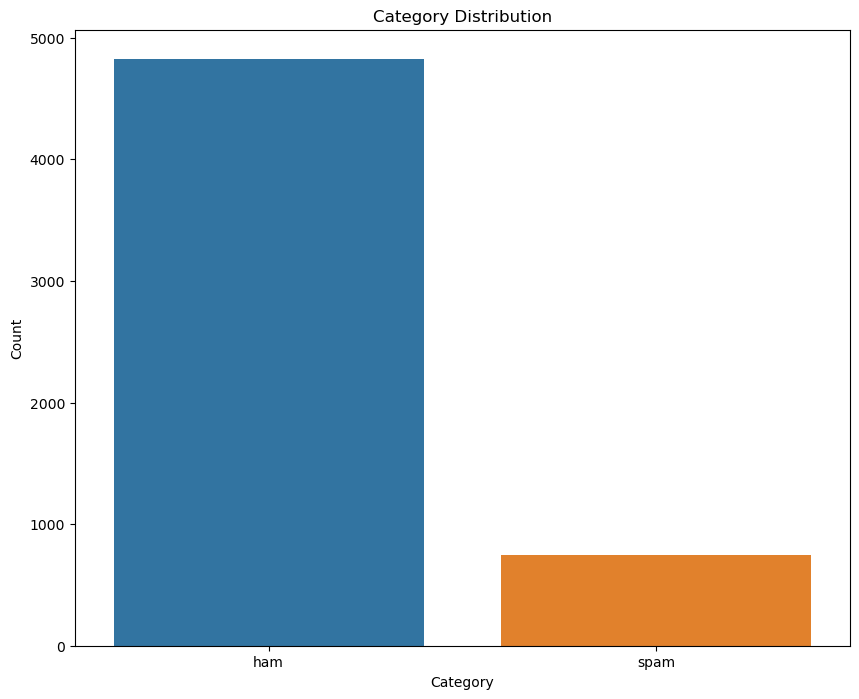

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(x=df["Category"].value_counts().index, y=df["Category"].value_counts().values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')

# Mapping Categories to Numerical Values for Spam Detection

In [35]:
df["Category"]=df["Category"].map({'ham': 0, 'spam': 1})

In [37]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Initializing CountVectorizer for Text Vectorization

In [43]:
cv = CountVectorizer()

In [47]:
x = df["Message"]
y = df["Category"]

In [49]:
x = cv.fit_transform(x)

In [51]:
x

<5572x8709 sparse matrix of type '<class 'numpy.int64'>'
	with 74098 stored elements in Compressed Sparse Row format>

# Splitting Dataset into Training and Testing Sets

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [57]:
print(x.shape)
print(y.shape)

(5572, 8709)
(5572,)


# Initializing Multinomial Naive Bayes Model for Classification

In [65]:
model = MultinomialNB()

In [75]:
model.fit(x_train,y_train)


MultinomialNB()

In [77]:
y_predict = model.predict(x_test)

# Evaluating Model Performance Using Regression Metrics

In [87]:
print("mean_squared_error:",mean_squared_error(y_test,y_predict))
print("mean_absolute_error",mean_absolute_error(y_test,y_predict))
print("r2_score",r2_score(y_test,y_predict))

mean_squared_error: 0.014349775784753363
mean_absolute_error 0.014349775784753363
r2_score 0.8760543026665


# Predicting Spam or Ham for User-Input Messages

In [121]:
msg = input("Enter Your Message: ")
vect = cv.transform([msg]).toarray()
result = model.predict(vect)
print("Spam message" if result==1 else "Not spam")

Enter Your Message:  Congratulations! You've won a free iPhone 15. Click the link to claim your prize: www.scamlink.com. Spam msg


Spam message
